In [32]:
import pandas as pd
import numpy as np
from tabulate import tabulate
from datasets import load_dataset, ClassLabel, Value, Features
import make_dataset as md
from typing import Dict

### Reading and removing unwanted information

In [50]:
df = pd.read_csv('data/raw/npd_data')
df.dropna(subset=['content'], inplace=True)
print(tabulate(df.head(), headers='keys', tablefmt='psql'))
print(df.shape)


+----+------------------------------------------+------------------------------------------------------------------+--------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------------------+-------------------------+-------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Files which produced the data
It appears that the data originates from PDF files, with each file page corresponding to a distinct entry.
- Checking number of files present.

In [53]:
filename_counts = {}
for idx, name in df['filename'].items():
    if name in filename_counts:
        filename_counts[name] += 1
    else:
        filename_counts[name] = 1

print(f"Total number of files are {len(filename_counts)}, and the maximum value is {max(filename_counts.values())}")

Total number of files are 140, and the maximum value is 313


In [77]:
df_sorted = df.sort_values(by=['filename', 'page'])

# Group by filename and concatenate content
df_concatenated = df_sorted.groupby('filename')['content'].agg(''.join).reset_index()
print(tabulate(df_concatenated.head(), headers='keys'))

    filename                                                      content
--  ------------------------------------------------------------  --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

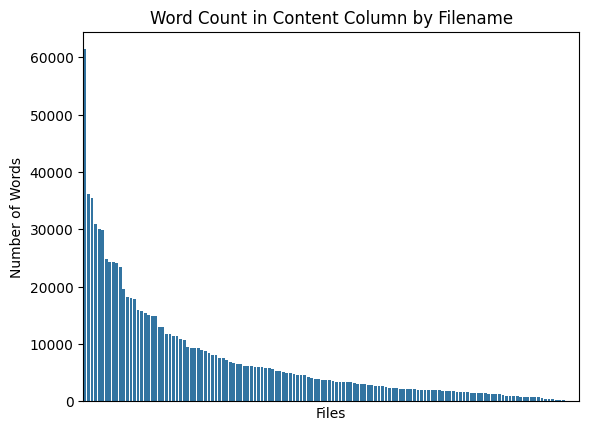

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_concatenated is your DataFrame with concatenated content
# If not, replace it with your actual DataFrame

# Add a new column 'word_count' to count the number of words in the 'content' column
df_concatenated['word_count'] = df_concatenated['content'].apply(lambda x: len(x.split()))
df_concatenated.sort_values(by=['word_count'], inplace=True, ascending=False)
# Create a bar plot using seaborn
sns.barplot(x='filename', y='word_count', data=df_concatenated, errorbar=None)

# Set labels and title
plt.xlabel('Files')
plt.ylabel('Number of Words')
plt.title('Word Count in Content Column by Filename')

# Remove x-axis labels
plt.xticks([])

# Show the plot
plt.show()


In [63]:
import re

# Assuming df_concatenated is your DataFrame with concatenated content
# If not, replace it with your actual DataFrame

# Define a simple pattern for tabular data
tabular_pattern = re.compile(r'\w+\t\w+\t\w+')  # Assumes columns separated by tabs

# Check if any row in 'content' column matches the pattern
df_concatenated['is_tabular'] = df_concatenated['content'].apply(lambda x: bool(tabular_pattern.search(x)))

# Print rows where tabular data is detected
print(df_concatenated[df_concatenated['is_tabular']])


Empty DataFrame
Columns: [filename, content, word_count, is_tabular]
Index: []
